# __Data Preprocessing__

In [2]:
# global settings
# show all col/rows without hiding 
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) 

## __1) Load Dataset__

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from scipy import stats
import seaborn as sns

# headers

col_name_meterB = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
    'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
    'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
    'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
    'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
    'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
    'Transit Time P2T', 'Transit Time P2R', 'Transit Time P3T',
    'Transit Time P3R', 'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_meterB_no_class = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
    'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
    'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
    'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
    'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
    'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
    'Transit Time P2T', 'Transit Time P2R', 'Transit Time P3T',
    'Transit Time P3R', 'Transit Time P4T', 'Transit Time P4R'
]

df_meterB = pd.read_csv('dataset/Meter B', header=None, sep='\t')
df_meterB.columns = col_name_meterB

df_meterB.head()


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,...,49.8,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,...,49.8,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,...,49.8,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,...,49.8,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,...,49.8,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1


## __2) Identity Outlier Data in the attributes__
View boxplot for indivdual attributes
- Profile factor selected as it has highest number of outliers

<AxesSubplot:>

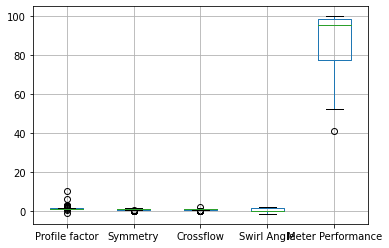

In [4]:
col_name_list= [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle', 'Meter Performance' ,
]

df_meterB[col_name_list].boxplot(figsize=(20,10))

## __3) Check Missing Value__
Check missing value and drop row with missing value. Meter B no missing value or row drop



In [5]:
# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",df_meterB.shape)
res = df_meterB.notnull()
print("\nDataFrame displaying False for Null (NaN) value = \n",res)

df_meterB = df_meterB.dropna()
print("\nDataFrame after removing null values...\n",df_meterB)
print("\n(Updated) Number of rows and column in our DataFrame = ",df_meterB.shape)


Number of rows and column in our DataFrame =  (92, 52)

DataFrame displaying False for Null (NaN) value = 
     Profile factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity P1  \
0             True      True       True         True              True   
1             True      True       True         True              True   
2             True      True       True         True              True   
3             True      True       True         True              True   
4             True      True       True         True              True   
..             ...       ...        ...          ...               ...   
87            True      True       True         True              True   
88            True      True       True         True              True   
89            True      True       True         True              True   
90            True      True       True         True              True   
91            True      True       True         True              True   

  

## __4) Check for Duplicate Values__

In [6]:
dups = df_meterB.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## __5) Check for 0 value in dataset__

In [7]:
# Count number of zeros in all columns of Dataframe
for column_name in df_meterB.columns:
    column = df_meterB[column_name]
    # Get the count of Zeros in each column 
    count = (column == 0).sum()
    print(f'Count of zeros in column: {column_name} is : {count}')

Count of zeros in column: Profile factor is : 0
Count of zeros in column: Symmetry is : 15
Count of zeros in column: Crossflow is : 15
Count of zeros in column: Swirl Angle is : 15
Count of zeros in column: Flow Velocity P1 is : 0
Count of zeros in column: Flow Velocity P2 is : 0
Count of zeros in column: Flow Velocity P3 is : 0
Count of zeros in column: Flow Velocity P4 is : 15
Count of zeros in column: Average Flow Velocity is : 0
Count of zeros in column: Speed of Sound P1 is : 0
Count of zeros in column: Speed of Sound P2 is : 0
Count of zeros in column: Speed of Sound P3 is : 0
Count of zeros in column: Speed of Sound P4 is : 15
Count of zeros in column: Average Speed of Sound is : 0
Count of zeros in column: Signal Strength P1T is : 0
Count of zeros in column: Signal Strength P1R is : 0
Count of zeros in column: Signal Strength P2T is : 0
Count of zeros in column: Signal Strength P2R is : 0
Count of zeros in column: Signal Strength P3T is : 0
Count of zeros in column: Signal Stre

## __6) Count Labels:__
- Healthy: 19
- Gas Injection: 14
- Waxing: 35
 

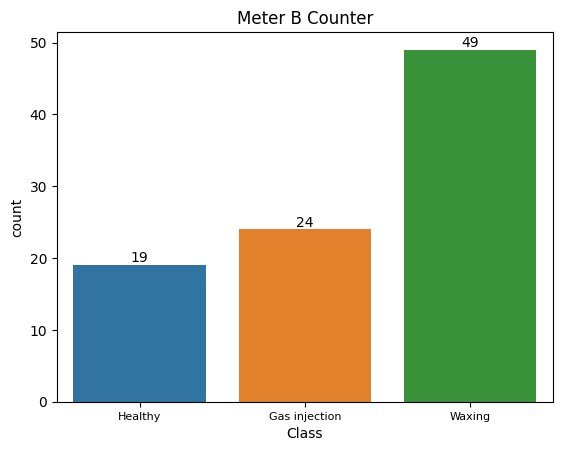

In [8]:
ax = sns.countplot(x=df_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('Meter B Counter')
plt.show()

## __7) 2 Paths to handle 0 value:__ 
1. Remove whole row with 0 (df_remove_meterB)
- 57 rows remained (35 rows removed)

2. Replace 0 with median (df_median_meterB)
- 62 rows remained (30 rows removed)

Steps: 
1)  Select Profile Factor 
2)  View Box plot (IQT), Line graph
    - The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.
3) Remove outlier with Zscore
    - The further away an observation’s Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.

### __7.1) 1st Method: Remove whole row with 0__
- df_remove_meterB(IQT->Zscore) 

In [9]:
print('Inital Shape: '+str(df_meterB.shape))
df_remove_meterB = df_meterB.replace(0, np.nan)
df_remove_meterB = df_remove_meterB.dropna(how='any', axis=0) # axis = 0(row), = 1(columns)
df_remove_meterB = df_remove_meterB.replace(np.nan, 0)
print('After remove 0 Shape: '+str(df_remove_meterB.shape))

Inital Shape: (92, 52)
After remove 0 Shape: (77, 52)


Initial Line Graph 

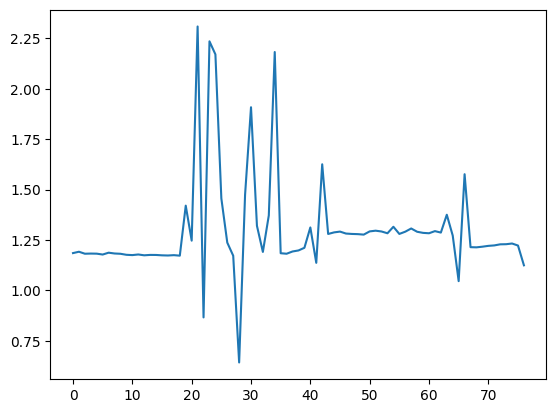

<Figure size 1000x700 with 0 Axes>

In [10]:
val_1 = df_remove_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

#### IQT Boxplot for Profile Factor (df_remove)

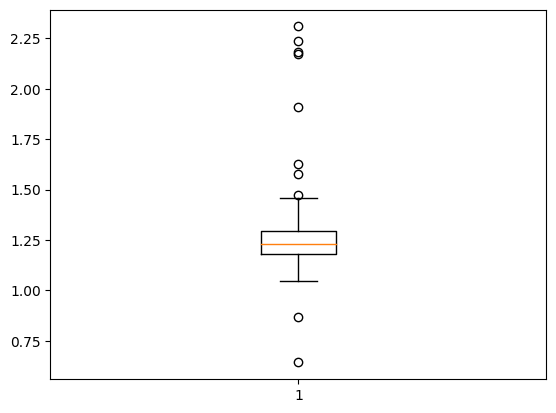

<Figure size 1000x700 with 0 Axes>

IQR: 0.11020555599999993 Upper bound: 1.4574972229999998 Lower bound: 1.0166749990000001
Number of outliers: 10
The following are the outliers in the boxplot: 
21    2.308333
22    0.866283
23    2.234794
24    2.169950
28    0.642938
29    1.474453
30    1.908028
34    2.181761
42    1.625278
66    1.576100
Name: Profile factor, dtype: float64
After remove 0 Shape: (77, 52)


In [11]:
val_1 = df_remove_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)


outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print("Number of outliers: "+ str(len(outliers)))
print('The following are the outliers in the boxplot: \n{}'.format(outliers))
print('After remove 0 Shape: '+str(df_remove_meterB.shape))

#### Remove outliers

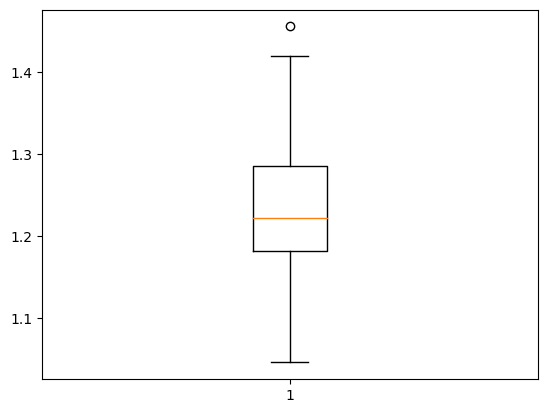

<Figure size 1000x700 with 0 Axes>

After remove IQT outliers Shape: (67, 52)


In [12]:
df_remove_meterB.drop(df_remove_meterB.index[[21,22,23,24,28,29,30,34,42,66]],inplace=True)

val_1 = df_remove_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()


print('After remove IQT outliers Shape: '+str(df_remove_meterB.shape))


#### Line graph for Profile Factor (df_remove)

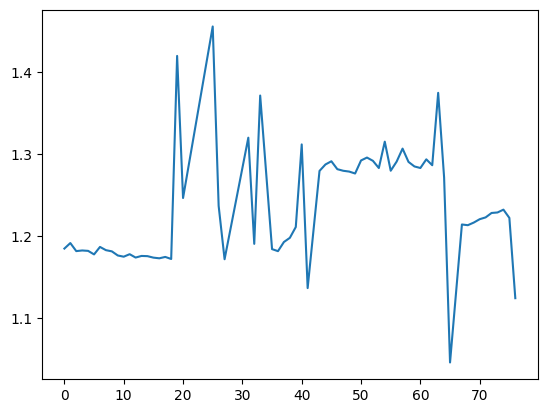

<Figure size 1000x700 with 0 Axes>

In [13]:
val_1 = df_remove_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

#### Apply Zscore to all columns (df_remove)
- 67 to 57 =  10 rows removed 

In [14]:
z_scores = stats.zscore(df_remove_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_remove_meterB = df_remove_meterB[filtered_entries]

print('After Zscore Shape: '+str(df_remove_meterB.shape))

After Zscore Shape: (57, 52)


### __7.2) 2nd Method: Replace 0 with median__
- df_median_meterB(IQT->Zscore) <--Select>
- df_median_meterB2(Zcore -> IQT)

#### __df_median_meterB(IQT->Zscore)__ 

Replace 0 with median

In [15]:
df_median_meterB = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB.loc[df_median_meterB[col_name] == 0, str(col_name)] = df_median_meterB[col_name].median()
print('Inital Shape: '+str(df_median_meterB.shape))

Inital Shape: (92, 52)


Inital Line Graph 

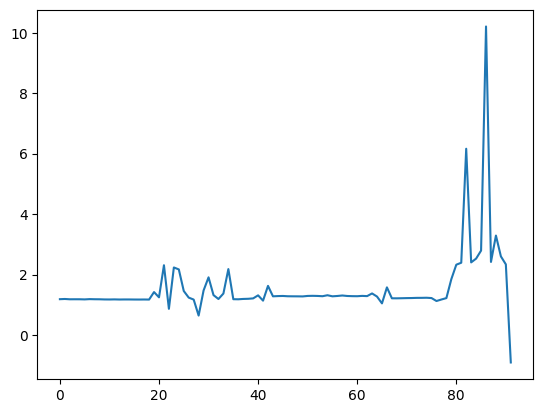

<Figure size 1000x700 with 0 Axes>

In [16]:
val_1 = df_median_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()


IQT Boxplot for Profile Factor (df_median)

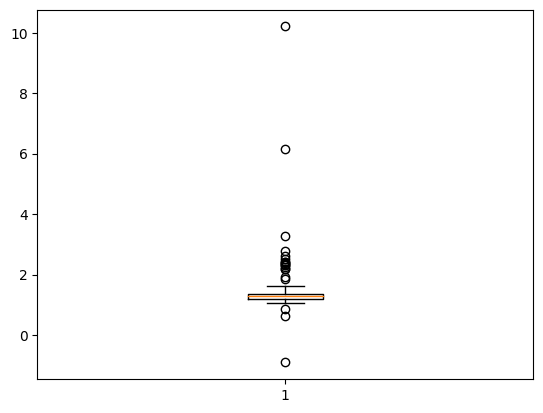

<Figure size 1000x700 with 0 Axes>

IQR: 0.19005833324999966 Upper bound: 1.6577847218749993 Lower bound: 0.8975513888750006
The following are the outliers in the boxplot:21     2.308333
22     0.866283
23     2.234794
24     2.169950
28     0.642938
30     1.908028
34     2.181761
79     1.848737
80     2.326092
81     2.391191
82     6.163156
83     2.402433
84     2.528122
85     2.792661
86    10.208497
87     2.418111
88     3.290425
89     2.601044
90     2.336800
91    -0.909168
Name: Profile factor, dtype: float64
Number of outliers: 20


In [17]:
val_1 = df_median_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

Remove outliers

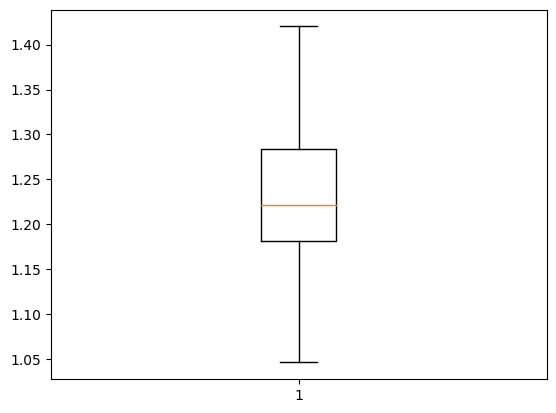

<Figure size 1000x700 with 0 Axes>

After remove IQT outliers Shape: (68, 52)


In [18]:
df_median_meterB.drop(df_median_meterB.index[[21,22,23,24,28,28,30,34,79,80,81,82,83,84,85,86,87,88,89,90,91,25,29,42,66]],inplace=True)
val_1 = df_median_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()
print('After remove IQT outliers Shape: '+str(df_median_meterB.shape))


Line graph for Profile Factor (df_median)

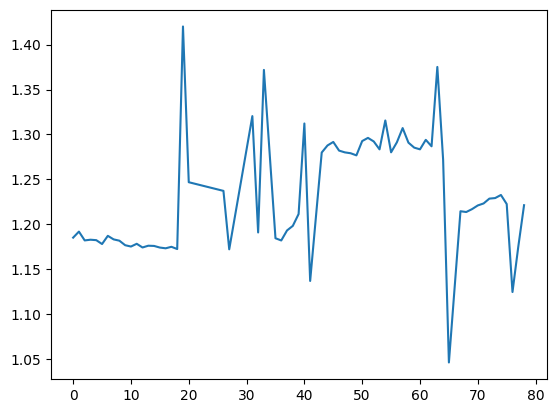

<Figure size 1000x700 with 0 Axes>

In [19]:
val_1 = df_median_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

Apply Zscore to all columns (df_median)

68 to 58 = 10 rows removed

In [20]:
z_scores = stats.zscore(df_median_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB = df_median_meterB[filtered_entries]
print('After Zscore Shape: '+str(df_median_meterB.shape))

After Zscore Shape: (58, 52)


In [21]:
dataset = df_median_meterB

X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

scaler = StandardScaler()
X=scaler.fit_transform(X)


plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatterplot for IQT -> Zscore')
plt.colorbar()

NameError: name 'StandardScaler' is not defined

In [ ]:
df_median_meterB2 = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB2.loc[df_median_meterB2[col_name] == 0, str(col_name)] = df_median_meterB2[col_name].median()
print('Inital Shape: '+str(df_median_meterB2.shape))



Inital Shape: (68, 52)


In [ ]:
z_scores = stats.zscore(df_median_meterB2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB2 = df_median_meterB2[filtered_entries]
print('After Zscore Shape: '+str(df_median_meterB2.shape))

After Zscore Shape: (58, 52)


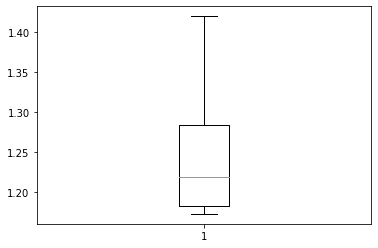

<Figure size 720x504 with 0 Axes>

IQR: 0.10135277824999989 Upper bound: 1.4354375008749998 Lower bound: 1.0300263878750002
The following are the outliers in the boxplot:Series([], Name: Profile factor, dtype: float64)
Number of outliers: 0


In [ ]:
val_1 = df_median_meterB2['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

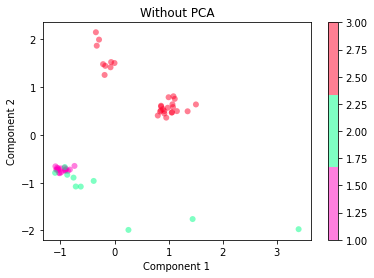

In [ ]:
dataset = df_median_meterB

X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

scaler = StandardScaler()
X=scaler.fit_transform(X)


plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Without PCA')
plt.colorbar()

#### __df_median_meterB2(Zscore->IQT)__ 

In [ ]:
df_meterB = pd.read_csv('dataset/Meter B', header=None, sep='\t')
df_meterB.columns = col_name_meterB

df_median_meterB2 = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB2.loc[df_median_meterB2[col_name] == 0, str(col_name)] = df_median_meterB2[col_name].median()
print('Inital Shape: '+str(df_median_meterB2.shape))

Inital Shape: (92, 52)


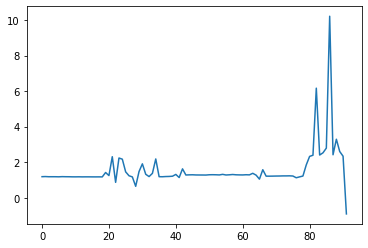

<Figure size 720x504 with 0 Axes>

In [ ]:
val_1 = df_median_meterB2['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

Zcore = 92 to 82

In [ ]:
z_scores = stats.zscore(df_median_meterB2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB2 = df_median_meterB2[filtered_entries]
df_median_meterB2= df_median_meterB2.reset_index(drop=True)
print('After Zscore Shape: '+str(df_median_meterB2.shape))

After Zscore Shape: (82, 52)


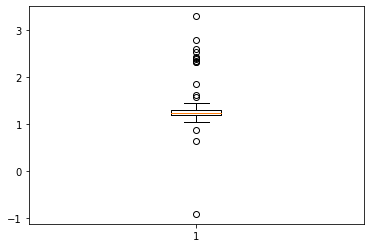

<Figure size 720x504 with 0 Axes>

IQR: 0.11160138874999981 Upper bound: 1.4610590271249997 Lower bound: 1.0146534721250005
The following are the outliers in the boxplot:
21    2.30833
22    0.86628
26    0.64294
35    1.62528
59    1.57610
71    1.84874
72    2.32609
73    2.39119
74    2.40243
75    2.52812
76    2.79266
77    2.41811
78    3.29042
79    2.60104
80    2.33680
81   -0.90917
Name: Profile factor, dtype: float64
Number of outliers: 16


In [ ]:
val_1 = df_median_meterB2['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

Remove outliers

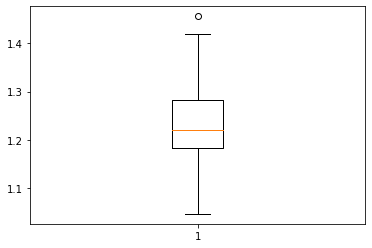

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (66, 52)


In [ ]:
df_median_meterB2.drop(df_median_meterB2.index[[21,22,26,35,59,71,72,73,74,75,76,77,78,79,80,81]],inplace=True)
val_1 = df_median_meterB2['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()
print('After remove IQT outliers Shape: '+str(df_median_meterB2.shape))

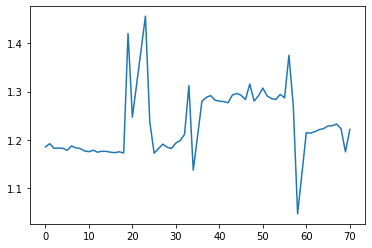

<Figure size 720x504 with 0 Axes>

In [ ]:
val_1 = df_median_meterB2['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

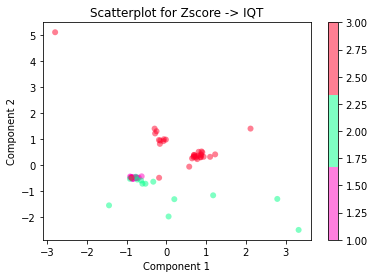

In [ ]:
dataset = df_median_meterB2

X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

scaler = StandardScaler()
X=scaler.fit_transform(X)


plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatterplot for Zscore -> IQT')
plt.colorbar()

## __8) Reduce Dimension with Principal Componenent Analysis (PCA)__
Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

### Normalize data
PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set

In [ ]:
from sklearn.preprocessing import StandardScaler
# load dataset
dataset = df_median_meterB
X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']
# normalize data
scaler = StandardScaler()
X=scaler.fit_transform(X)

### Store projected values of the into a dataframe called projected 1

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X) # make model learn prepare the eigenvector/values

projected = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6']) 
projected.head()


,PC1,PC2,PC3,PC4,PC5,PC6
0,2.39343,-3.91634,0.26906,-0.27356,1.42223,-1.65552
1,2.32804,-3.86697,0.26836,-0.38445,1.42419,-1.74416
2,2.05864,-3.47697,1.14106,-0.03141,0.58310,-1.36027
3,2.05645,-3.34874,1.15899,0.00232,0.56991,-1.30275
4,2.07041,-3.45097,1.17343,0.03617,0.58930,-1.34888


### Plot Cummulative variances with individual variance
- add as many pc components possible closest to 100%

Result: 4 PC components is sufficent to represent the entire variance of the data. 3 PC is too low 
while 5 PC is too much

Explained variance ratio: [20.14216279 11.16934501  7.56208547  5.70289444  2.96188212  1.99030232]
Total cummulative sum: 49.52867214529293


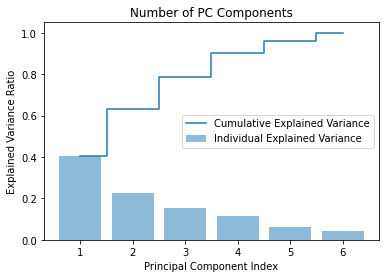

In [ ]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(f"Explained variance ratio: {pca.explained_variance_}")
print(f"Total cummulative sum: {tot}")
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,7), var_exp, alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,7), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

### Plot explained variance ratio

Text(0, 0.5, 'Cumulative Varience')

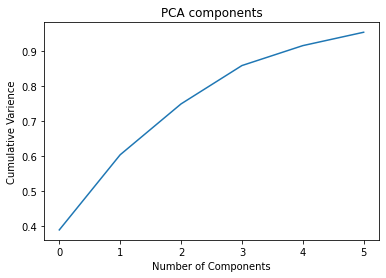

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

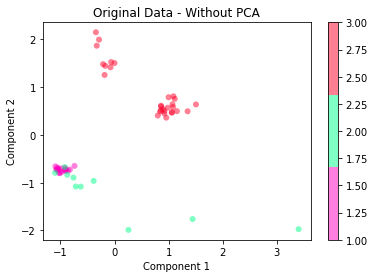

In [ ]:
plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - Without PCA')
plt.colorbar()

### Plot scatter plot for PCA

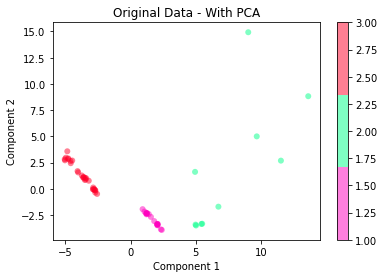

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - With PCA')
plt.colorbar()

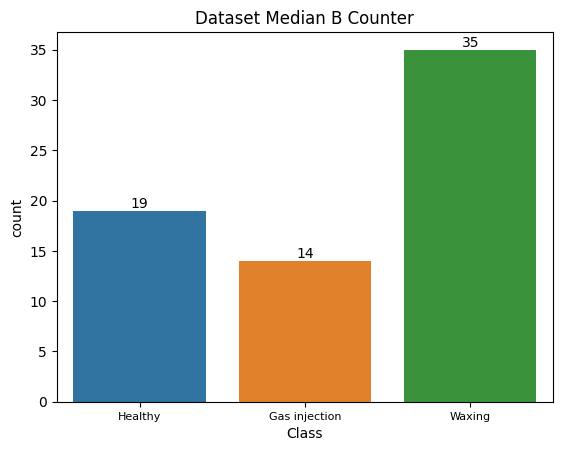

In [22]:
ax = sns.countplot(x=df_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('Dataset Median B Counter')
plt.show()

## __11) Feature Importance - PCA__
 
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

### All Results

In [ ]:
df_pca = pd.DataFrame(abs(pca.components_), columns=col_name_meterB_no_class)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5','PC6'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.05683,0.20314,0.18274,0.12474,0.11188,0.11197,0.10450,0.07771,0.10518,0.13232,...,0.18586,0.18586,0.13979,0.13295,0.11044,0.00057,0.06964,0.09866,0.18591,0.18842
PC2,0.12383,0.08619,0.00929,0.09833,0.10150,0.10721,0.09874,0.08732,0.10170,0.12246,...,0.11919,0.11919,0.07944,0.09446,0.11651,0.01391,0.07081,0.09816,0.10584,0.10897
PC3,0.20135,0.05990,0.01006,0.14504,0.23229,0.22890,0.24056,0.27177,0.23917,0.16529,...,0.12153,0.12153,0.20628,0.18844,0.20373,0.03354,0.12902,0.05208,0.13832,0.12663
PC4,0.22864,0.06804,0.21171,0.25673,0.08097,0.07696,0.04907,0.08882,0.06857,0.02029,...,0.08220,0.08220,0.01312,0.02275,0.09375,0.24164,0.34191,0.34481,0.07862,0.07523
PC5,0.12319,0.09731,0.01425,0.05441,0.24564,0.24771,0.26412,0.25239,0.25544,0.25400,...,0.02371,0.02371,0.23922,0.27702,0.11857,0.17968,0.14007,0.05592,0.01486,0.00469
PC6,0.05208,0.00970,0.18688,0.12867,0.07193,0.07158,0.09076,0.05031,0.07730,0.18449,...,0.06541,0.06541,0.10014,0.09640,0.30511,0.53484,0.07426,0.04433,0.08163,0.08329


### Individual PC Results

#### PC1 

In [ ]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pca_k_means.components_[0])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Symmetry,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P4T,Transit Time P4R,Speed of Sound P4,Transit Time P4T,Gain P4T,Gain P4R,...,Signal Strength P3R,Transit Time P3T,Signal Quality P3T,Gain P2T,Gain P2R,Signal Quality P3R,Profile factor,Turbulence P3,Meter Performance,Transit Time P2R
0,0.20314,0.19124,0.19109,0.18989,0.18907,0.18842,0.18721,0.18591,0.18586,0.18586,...,0.07008,0.06964,0.06943,0.06898,0.06898,0.06653,0.05683,0.02880,0.00393,0.00057


#### PC2

In [ ]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pca_k_means.components_[1])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Meter Performance,Turbulence P3,Signal Strength P3R,Turbulence P2,Gain P2T,Gain P2R,Signal Strength P3T,Signal Quality P3T,Signal Quality P3R,Signal Quality P2R,...,Gain P1T,Gain P1R,Speed of Sound P2,Flow Velocity P4,Symmetry,Speed of Sound P3,Transit Time P1T,Transit Time P3T,Transit Time P2R,Crossflow
0,0.26252,0.25336,0.22397,0.21126,0.19966,0.19966,0.19673,0.18772,0.18712,0.18669,...,0.09145,0.09145,0.08857,0.08732,0.08619,0.08616,0.07944,0.07081,0.01391,0.00929


#### PC3 

In [ ]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pca_k_means.components_[2])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Flow Velocity P4,Flow Velocity P3,Average Flow Velocity,Flow Velocity P1,Flow Velocity P2,Transit Time P1T,Transit Time P2T,Profile factor,Signal Quality P3T,Signal Quality P3R,...,Transit Time P3R,Signal Strength P2R,Signal Strength P4T,Signal Strength P2T,Turbulence P2,Transit Time P2R,Crossflow,Turbulence P4,Signal Quality P2T,Signal Quality P2R
0,0.27177,0.24056,0.23917,0.23229,0.22890,0.20628,0.20373,0.20135,0.19847,0.19374,...,0.05208,0.05098,0.04738,0.04128,0.03697,0.03354,0.01006,0.00265,0.00185,0.00185


#### PC4 

In [ ]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pca_k_means.components_[3])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Speed of Sound P3,Transit Time P3R,Transit Time P3T,Gain P3T,Gain P3R,Swirl Angle,Transit Time P2R,Profile factor,Crossflow,Speed of Sound P2,...,Speed of Sound P1,Signal Quality P1R,Signal Quality P1T,Turbulence P1,Transit Time P1T,Turbulence P2,Gain P1T,Gain P1R,Average Speed of Sound,Signal Strength P1T
0,0.34715,0.34481,0.34191,0.28790,0.28790,0.25673,0.24164,0.22864,0.21171,0.18657,...,0.02029,0.01800,0.01788,0.01574,0.01312,0.00879,0.00768,0.00768,0.00516,0.00203


#### PC5

In [ ]:
df_pc5 =df_pca.iloc[[4]]
a = abs(pca_k_means.components_[4])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc5 = pd.DataFrame(values,columns=columns)
df_pc5

,Transit Time P1R,Flow Velocity P3,Average Flow Velocity,Speed of Sound P1,Flow Velocity P4,Flow Velocity P2,Flow Velocity P1,Transit Time P1T,Signal Quality P3T,Signal Quality P3R,...,Gain P4R,Signal Quality P4T,Turbulence P3,Transit Time P4T,Crossflow,Speed of Sound P4,Signal Strength P4T,Speed of Sound P2,Signal Quality P4R,Transit Time P4R
0,0.27702,0.26412,0.25544,0.25400,0.25239,0.24771,0.24564,0.23922,0.22834,0.22660,...,0.02371,0.02106,0.02069,0.01486,0.01425,0.00996,0.00744,0.00570,0.00569,0.00469


#### PC6

In [ ]:
df_pc6 =df_pca.iloc[[5]]
a = abs(pca_k_means.components_[5])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc6 = pd.DataFrame(values,columns=columns)
df_pc6

,Transit Time P2R,Speed of Sound P2,Transit Time P2T,Crossflow,Speed of Sound P1,Signal Strength P1R,Gain P3T,Gain P3R,Signal Strength P1T,Signal Strength P2R,...,Signal Quality P2T,Signal Strength P3T,Gain P1T,Gain P1R,Signal Strength P4R,Signal Strength P3R,Signal Quality P3T,Symmetry,Signal Quality P4T,Signal Strength P4T
0,0.53484,0.48250,0.30511,0.18688,0.18449,0.16492,0.15776,0.15776,0.14508,0.12907,...,0.04383,0.03633,0.02666,0.02666,0.01720,0.01654,0.01150,0.00970,0.00358,0.00117


### Biplots

#### PC1 and PC2

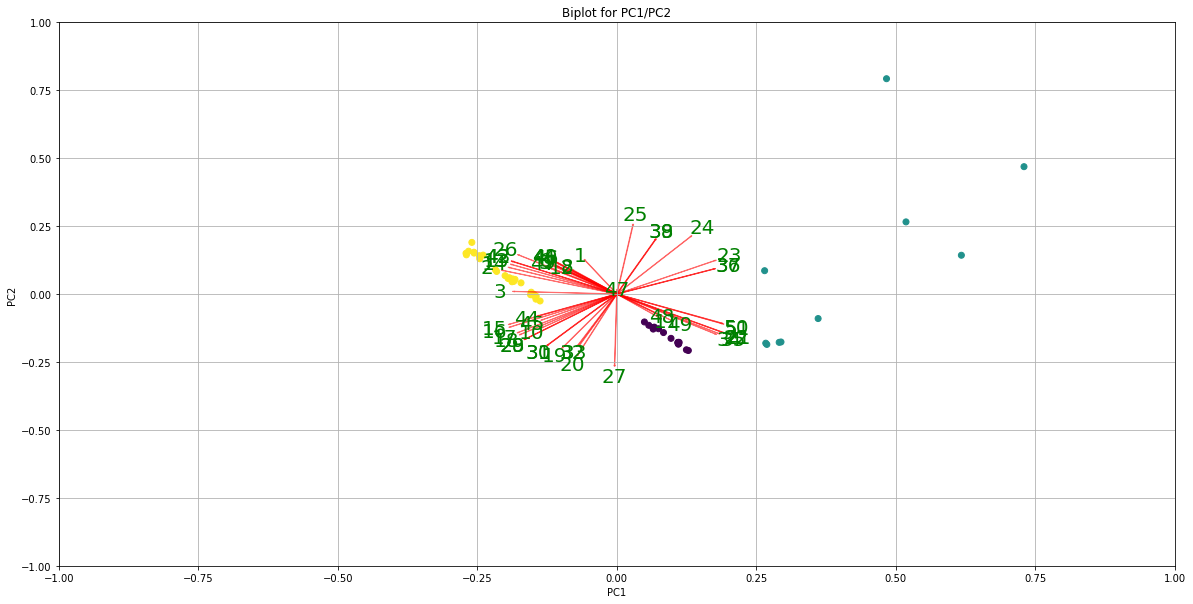

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= dataset['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca_kmeans[:,0:2],np.transpose(pca_k_means.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

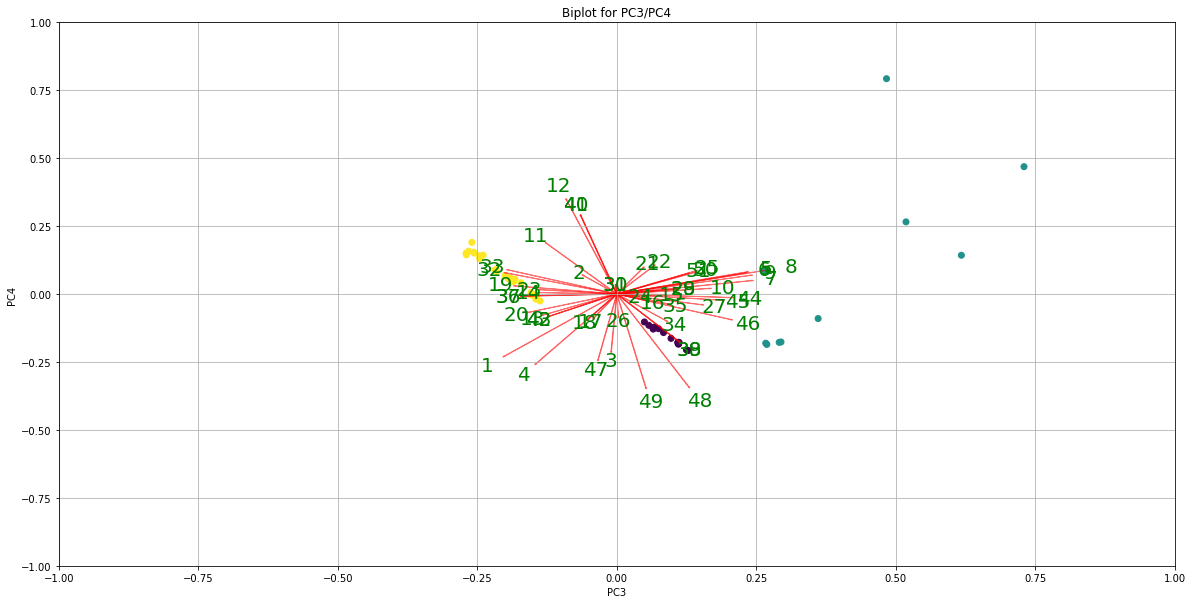

In [ ]:
#Call the function. Use only the 2 PCs.
myplot(X_pca_kmeans[:,0:2],np.transpose(pca_k_means.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

PC5 and PC6

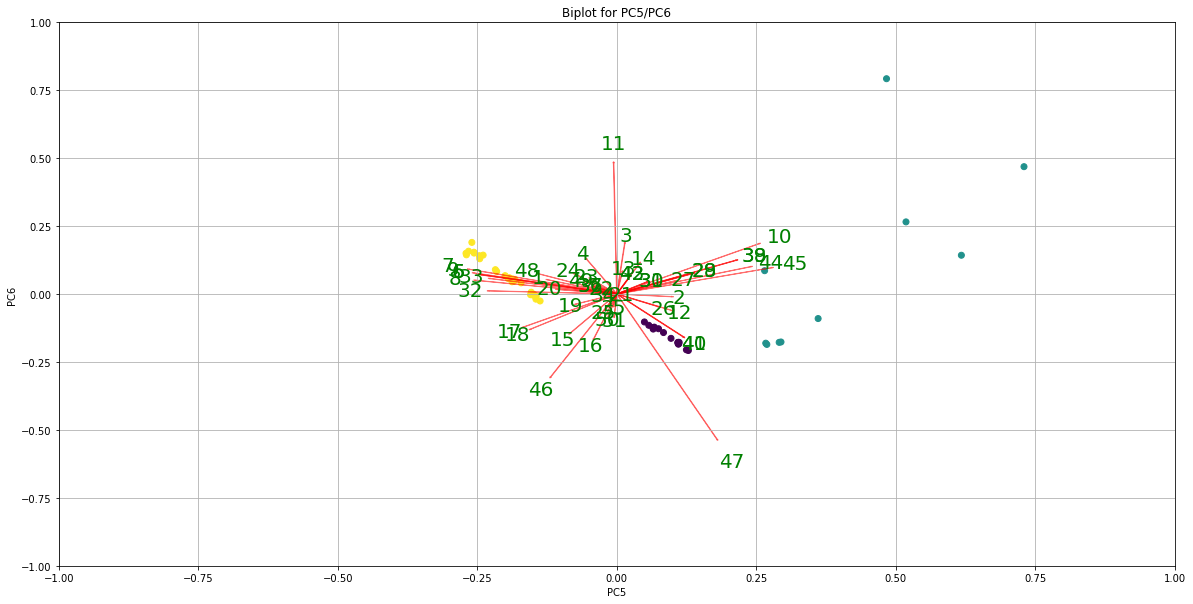

In [ ]:
#Call the function. Use only the 2 PCs.
myplot(X_pca_kmeans[:,0:2],np.transpose(pca_k_means.components_[4:6, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC5/PC6')
plt.xlabel("PC5".format(1))
plt.ylabel("PC6".format(2))
plt.show()

# __Data Mining__

## __1) Split Dataset 70/30__

In [ ]:
from sklearn.model_selection import train_test_split


# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## __2) Supervised Learning -LR,SVM,NLSVM,DT,NN,LD__

### Linear Prediction using Logistics Regression and linear Support Vector Machine 

Model score clf3: 0.9444444444444444
Highest training accuracy: 0.9444444444444444
Highest testing accuracy: 0.9444444444444444
Lowest testing accuracy: 0.6111111111111112


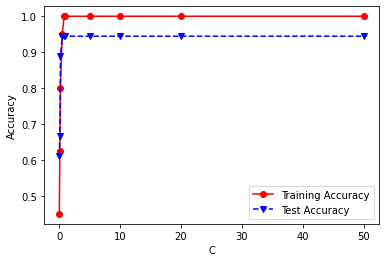

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')


print (f"Model score clf3: {clf3.score(X_test, y_test)}")
print("Highest training accuracy:", max(LRtestAcc))
print("Highest testing accuracy:", max(LRtestAcc))
print("Lowest testing accuracy:", min(LRtestAcc))




### Linear Support Vector Machine 

Model score clf4: 0.9444444444444444
Highest training accuracy: 0.9444444444444444
Highest testing accuracy: 0.9444444444444444
Lowest testing accuracy: 0.6111111111111112


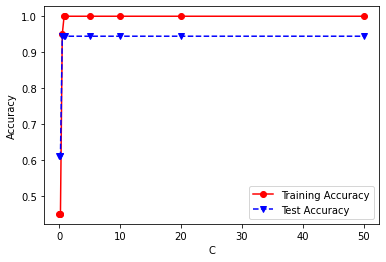

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')

print (f"Model score clf4: {clf4.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))



### Non Linear Support Vector Machine(SVM)

Model score: 0.9444444444444444
Highest training accuracy: 0.9444444444444444
Highest testing accuracy: 0.9444444444444444
Lowest testing accuracy: 0.6111111111111112


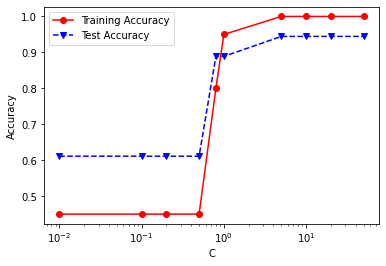

In [ ]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

print (f"Model score: {clf5.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))

### Decision Tree

Model score: 1.0
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.6111111111111112


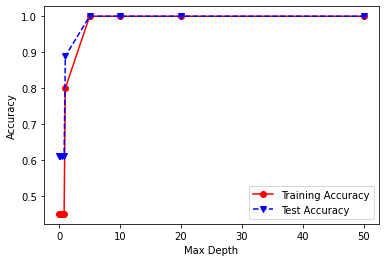

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier(max_depth=10)
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

print (f"Model score: {clf7.score(X_test, y_test)}")
print("Highest training accuracy:", max(dt_trainAcc))
print("Highest testing accuracy:", max(dt_testAcc))
print("Lowest testing accuracy:", min(dt_testAcc))

In [ ]:
Y = df_remove_meterB['Class']
X = df_remove_meterB.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

[Text(0.6, 0.8333333333333334, 'Gain P3T <= 51.4\nentropy = 1.445\nsamples = 57\nvalue = [19, 9, 29]\nclass = 3'),
 Text(0.4, 0.5, 'Signal Strength P1T <= 4410.6\nentropy = 0.906\nsamples = 28\nvalue = [19, 9, 0]\nclass = 1'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]\nclass = 2'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0]\nclass = 1'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = 3')]

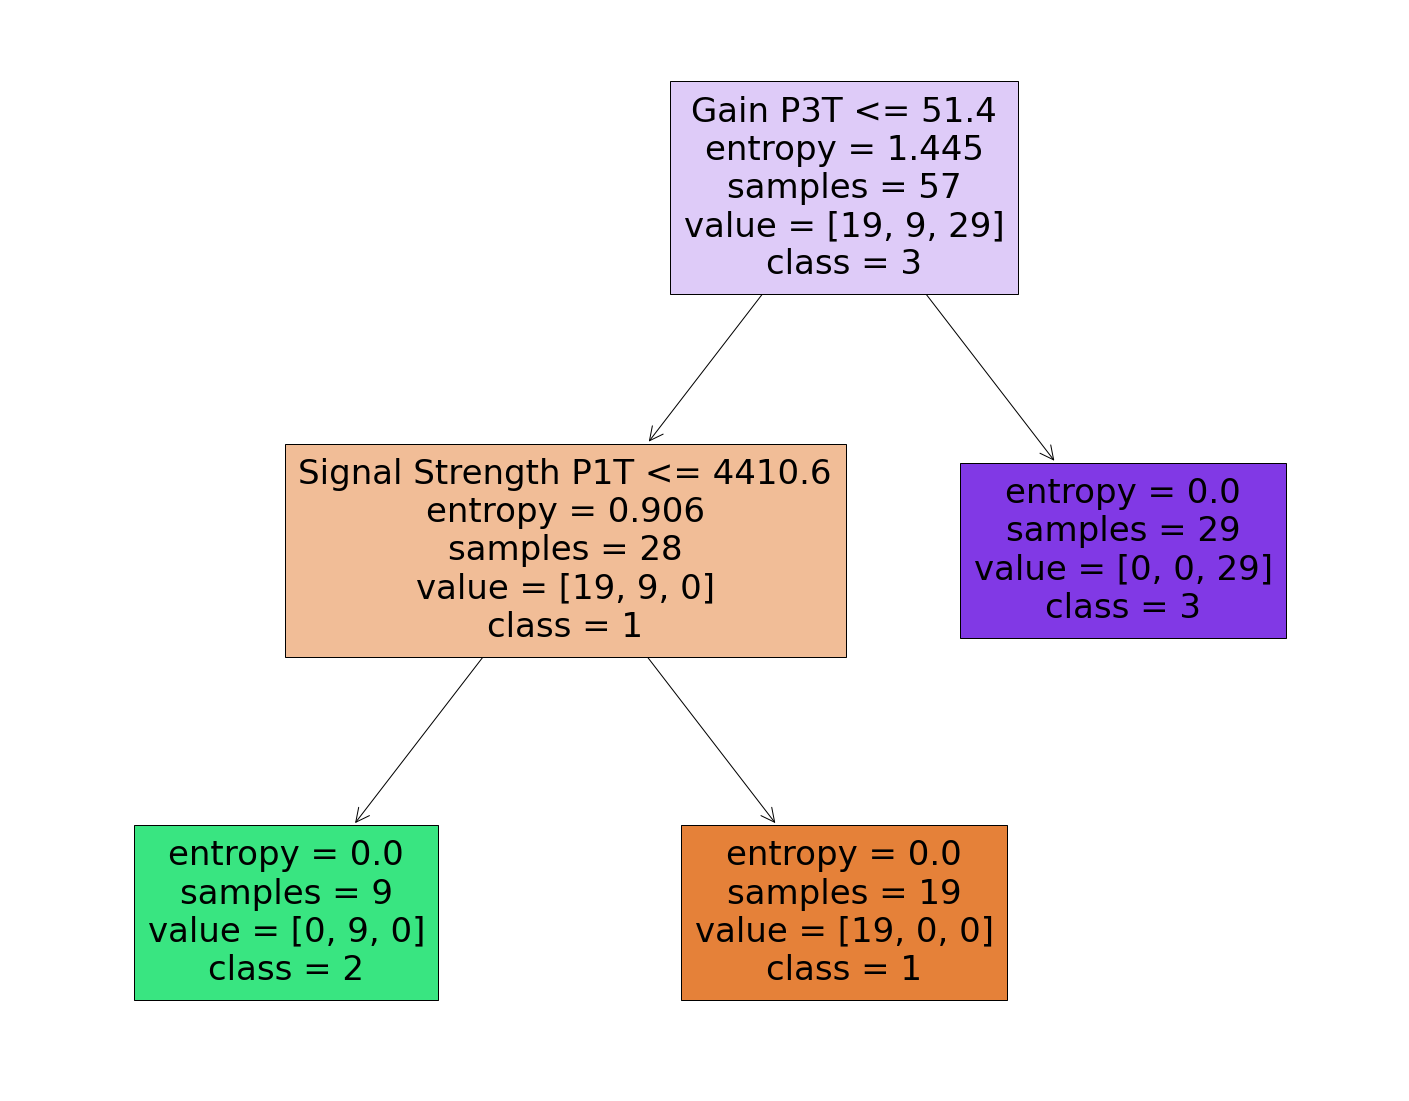

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)

### Neural Network

Model score: 0.9444444444444444
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.9444444444444444


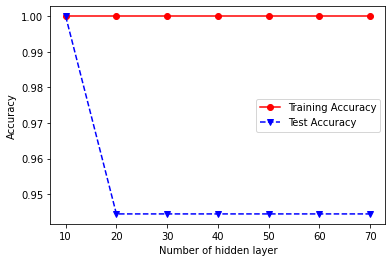

In [ ]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

print (f"Model score: {clf6.score(X_test, y_test)}")
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)

print (f"Model score: {clf2.score(X_test, y_test)}")
print("\nTraining Accuracy:",trainAcc)
print("\nTesting Accuracy:",testAcc)

Model score: 1.0

Training Accuracy: 1.0

Testing Accuracy: 1.0


### Linear Discriminant

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print (f"Model score: {lda.score(X_test, y_test)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.9444444444444444
Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 0.94


## __3) Unsupervised Learning - KNN, Kmeans__

### K Nearest Neighbour (KNN)

Model score: 0.5555555555555556
Highest training accuracy: 1.0
Highest testing accuracy: 0.9444444444444444
Lowest testing accuracy: 0.2777777777777778


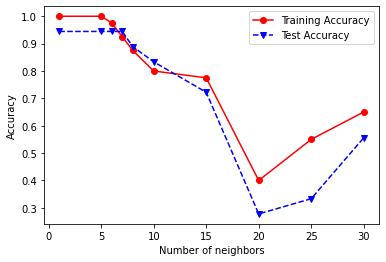

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print (f"Model score: {clf1.score(X_test, y_test)}")
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

### K-Means Clustering

Decide how many clustering solutions to test.

In [ ]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters =i,init='k-means++',random_state=0)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

Determine the number of clusters we’d like to keep. Use the Elbow-method

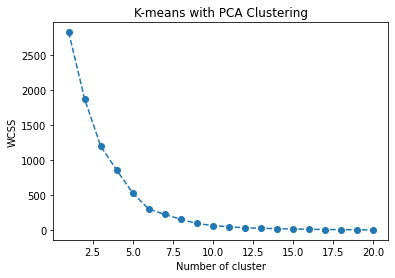

In [ ]:
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Initialise and fit data

In [ ]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=0)
# fit data into kmeans model
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

In [ ]:
df_segm_pca_kmeans = pd.concat([dataset.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-6:] =['PC1','PC2','PC3','PC4','PC5','PC6']
df_segm_pca_kmeans['K-means']= kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Transit Time P4T,Transit Time P4R,Class,PC1,PC2,PC3,PC4,PC5,PC6,K-means
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,...,84.01905,83.91997,1,2.39343,-3.91634,0.26906,-0.27356,1.42223,-1.65552,0
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,...,84.02561,83.92726,1,2.32804,-3.86697,0.26836,-0.38445,1.42419,-1.74416,0
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,...,84.04781,83.90159,1,2.05864,-3.47697,1.14106,-0.03141,0.58310,-1.36027,0
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,...,84.04372,83.89760,1,2.05645,-3.34874,1.15899,0.00232,0.56991,-1.30275,0
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,...,84.04535,83.89896,1,2.07041,-3.45097,1.17343,0.03617,0.58930,-1.34888,0


In [ ]:
df_segm_pca_kmeans['k_means_class']=df_segm_pca_kmeans['K-means'].map({0:1,1:3,2:2})

/Users/kenjileong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


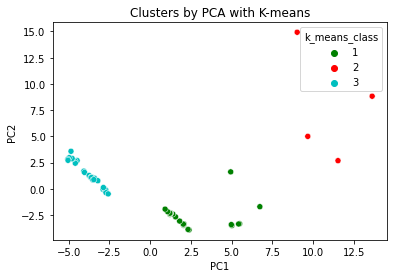

In [ ]:
import seaborn as sns
x_axis= df_segm_pca_kmeans['PC1']
y_axis= df_segm_pca_kmeans['PC2']
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['k_means_class'],palette=['g','r','c'])
plt.title('Clusters by PCA with K-means')
plt.show()

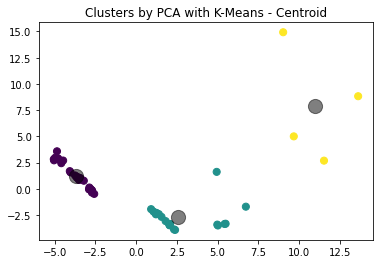

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters by PCA with K-Means - Centroid')
plt.show()

Percentage change between PCA and PCA with K-means__

In [ ]:
# drop pca columns
df_segm_pca_kmeans = df_segm_pca_kmeans.drop(['Class','PC1','PC2','PC3','PC4','PC5','PC6','K-means'],axis=1)
print(df_segm_pca_kmeans.shape)
df_segm_pca_kmeans.head()

(58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,k_means_class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,...,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,...,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,...,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,...,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,...,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [ ]:
print(df_median_meterB.shape)
df_median_meterB.head()

(58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,...,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,...,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,...,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,...,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,...,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [ ]:
# reset index
df_median_meterB = df_median_meterB.reset_index(drop=True)
df_segm_pca_kmeans = df_segm_pca_kmeans.reset_index(drop=True)

df = pd.concat(
    [df_median_meterB[['Class']], df_segm_pca_kmeans[['k_means_class']]],
    axis=1)

print(df['Class'].value_counts())
print(df['k_means_class'].value_counts())

df['compare'] = np.where(df['Class'] == df['k_means_class'], 'True', 'False')
changes = (df['compare'].values == 'False').sum()
percentage_change = (changes / df.shape[0]) * 100
print('Percentage change: ' + str(round(percentage_change, 2)))

3    29
1    19
2    10
Name: Class, dtype: int64
3    29
1    25
2     4
Name: k_means_class, dtype: int64
Percentage change: 10.34


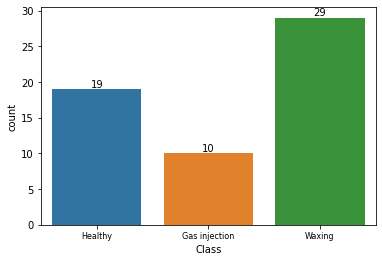

In [ ]:
ax = sns.countplot(x=dataset['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.show()

## __4) Anomaly Detection using Random Forest__

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


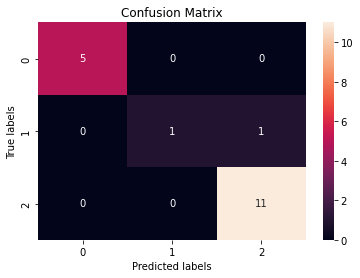

Accuracy : 0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

## __5) Anomaly Detection using Linear Regression(MSE, MAE, RMSE)__

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(X_pca_kmeans)
df.head()

,0,1,2,3,4,5
0,2.39343,-3.91634,0.26906,-0.27356,1.42223,-1.65552
1,2.32804,-3.86697,0.26836,-0.38445,1.42419,-1.74416
2,2.05864,-3.47697,1.14106,-0.03141,0.58310,-1.36027
3,2.05645,-3.34874,1.15899,0.00232,0.56991,-1.30275
4,2.07041,-3.45097,1.17343,0.03617,0.58930,-1.34888


In [ ]:
XTemp = df[0].values.reshape(-1, 1)
yTemp = df[1].values.reshape(-1, 1)

In [ ]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(
        XTemp, yTemp, test_size=0.3, random_state=0)

In [ ]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
y_predTemp = regressorTemp.predict(X_testTemp)

In [ ]:
print('Mean Absolute Error:',
          metrics.mean_absolute_error(y_testTemp, y_predTemp))
print('Mean Squared Error:',
        metrics.mean_squared_error(y_testTemp, y_predTemp))
print('Root Mean Squared Error:',
        np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)))
# get intercept:
print("y intercept: " + str(regressorTemp.intercept_))
# get slope:
print("slope: " + str(regressorTemp.coef_))

Mean Absolute Error: 2.0697717233022304
Mean Squared Error: 16.366220571509206
Root Mean Squared Error: 4.0455185788115235
y intercept: [-0.09639048]
slope: [[-0.07912449]]


Text(0, 0.5, 'PC2')

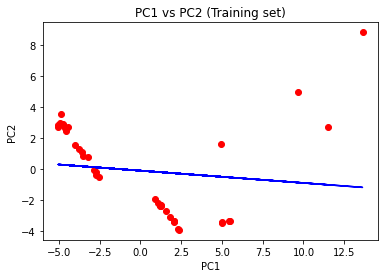

In [ ]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

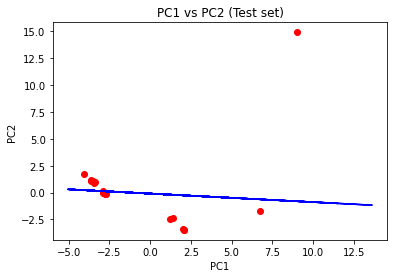

In [ ]:
  # show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')